Чек лист для изучения модели:

1. Как формулируется задача математически

2. Как выводится решение для весов модели исходя из пункта 1

3. Какие регуляризации используются. Как они влияют на п.1 и п.2

4. Как предобрабатывать данные для модели

5. Желательно имплементировать модель самостоятельно через numpy (или torch)

6. Какие библиотеки содержат имплементации. В чем разница между имплементациями, если их несколько

7. Обучить на датасете. Сравнить разные имплементации по скорости, памяти и качеству

8. Как контролировать обучение модели

9. Как посмотреть важность признаков. Что ещё можно полезного извлечь из обученной модели

## Пункт 1

Главная задача SVM — найти уравнение разделяющей гиперплоскости
$w_1x_1+w_2x_2+…+w_nx_n+w_0=0$

Функцию можно также представить, как:

$F(x) = sign(w^T*x+b)$, где $w = (w_1, w_2, …, w_n), b=w_0$

После настройки весов алгоритма $w$ и $b$ (обучения), все объекты, попадающие по одну сторону от построенной гиперплоскости, будут предсказываться как первый класс, а объекты, попадающие по другую сторону — второй класс.

Стоит заметить, что мы имеем право домножить параметры $w$ и $b$ на одну и ту же положительную константу и классификатор не изменится. Тогда можно отнормировать параметры так, что:

$min |(w^T*x+b)| = 1$

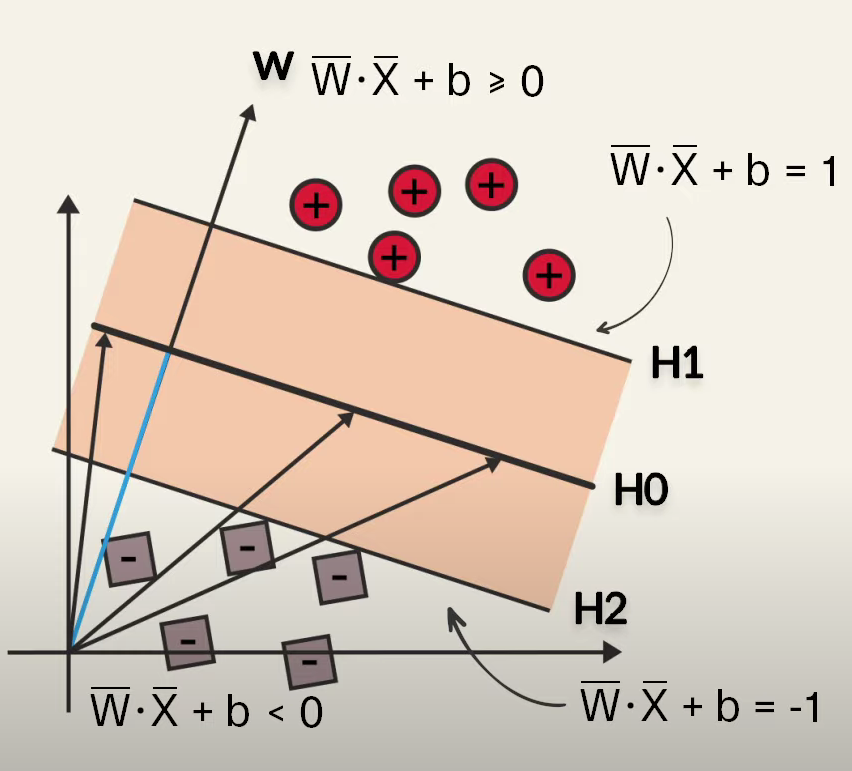

Задача SVM состоит в том, чтобы максимизировать зазор (margin) между гиперплоскостью и объектами классов, которые расположены ближе всего к ней (опорными векторами).

## Пункты 2-3

Существуют два случая решения задачи:

1. Разделимый случай

2. Неразделимый случай

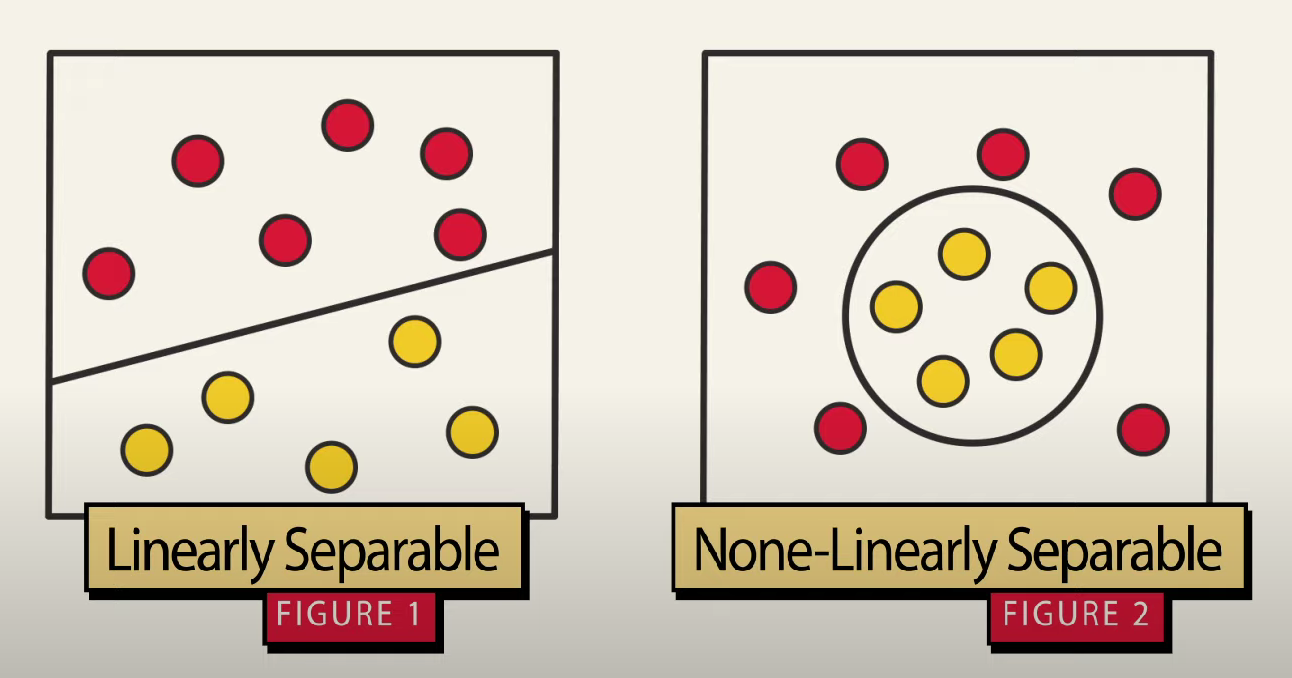

Начнём с разделимого случая. Для начала нужно найти проекцию вектора, концами которого являются опорные вектора разных классов (назовём их $x_+$ и $x_-$). По формуле проекции $ \large\frac{ā*b̄}{|b̄|}$ получим нужную нам проекцию:


$\frac{\langle(x_+-x_-),w\rangle}{\Arrowvert w\Arrowvert} = \frac{(\langle x_+,w\rangle - \langle x_-,w\rangle)}{\Arrowvert w\Arrowvert} = \frac{((b+1)-(b-1))}{\Arrowvert w\Arrowvert} = \frac{2}{\Arrowvert w\Arrowvert}$ - это и есть отступ

Поскольку наша задача максимизировать зазор:

$\frac{2}{\Arrowvert w\Arrowvert} \rightarrow max$

Перейдём к минимизации:

$\frac{1}{2}\Arrowvert w\Arrowvert^2 = \frac{(w^Tw)}{2} \rightarrow min$



Также заметим, что алгоритм даёт правильный ответ, когда выполняется условие:

$y(w^Tx+b) \geqslant 0$

Но поскольку мы делали нормировку, получим:

$y(w^Tx+b) \geqslant 1$

Тогда мы получим соответсвенную оптимизационную задачу:

$ \left\{ \begin{array}{ll} \frac{(w^Tw)}{2} \rightarrow min & \textrm{}\\ y(w^Tx+b) \geqslant 1 & \textrm{} \end{array} \right. $

Она также называется двойственной задачей поиска седловой точки функции Лагранжа.

Если же у нас неразделимый случай (это означает, что как минимум одно из условий выше будет нарушено), то существует подход сделать эти ограничения более "мягкими", то есть разрешим допускать небольшие ошибки и введём штраф за их нарушения. Введём набор дополнительных переменных $\xi _i > 0$, характеризующих величину ошибки на каждом объекте $x_i$. Тогда получим:

$ \left\{ \begin{array}{ll} \frac{(w^Tw)}{2} + \alpha\sum\xi _i \rightarrow min & \textrm{}\\ y(w^Tx_i+b) \geqslant 1 -\xi _i & \textrm{}\\ \xi _i\geqslant0& \textrm{} \end{array} \right. $

Перейдём к функции потерь и градиентному спуску. В качестве функции потерь в SVM обычно используется HingeLoss, его получают из:

$y(w^Tx_i-b) \geqslant 1 - \xi_i$

$\xi_i \geqslant 1 - y(w^Tx_i+b)$

Поскольку при этом функционале требуется, чтобы штрафы $\xi_i$ были как можно меньше, то получим:

$\xi_i = max(0,1 - y(w^Tx_i+b))$

Подставим это в систему уравнений выше и получим:

$\frac{(w^Tw)}{2} + \alpha\sum\max(0,1 - y(w^Tx_i+b)) \rightarrow min$

$L = \frac{(w^Tw)}{2} + \alpha\sum\max(0,1 - y(w^Tx_i+b))$

Однако существует другая формула функции потерь, которая используется гораздо чаще:

$L = λ\Arrowvert w\Arrowvert^2 + \frac{1}{n}\sum\max(0,1 - y_i(w^Tx_i+b))$

Будем использовать эту формулу и находить для неё градиенты

Найдём градиенты:

Если $y_i(w^Tx_i+b) < 1$:

$\large\frac{\partial L}{\partial w} = 2\lambda w - y_ix_i$

$\large\frac{\partial L}{\partial b} = y_i$

Тогда градиентный спуск:

$w = w - \eta * (2\lambda w - y_ix_i)$

$b = b - \eta * y_i$

Иначе:

$\large\frac{\partial L}{\partial w} = 2\lambda w$

$\large\frac{\partial L}{\partial b}  = 0$

Тогда градиентный спуск:

$w = w - \eta * 2\lambda w$

$b = b$

## Пункт 4

Предобработка данных:

1.  Заполнение пропусков (чаще всего средним значением или медианой)
2.  Кодировка (OneHotEncoder, LabelEncoder, BinaryEncoder, HelmetEncoder, Backward-Difference Encoder, TargetEncoding ...)
3. Масштабирование признаков (StandardScaler, MinMaxScaler)
4.  Добавление признаков (полиномиальные признаки, взятие логарифма, квадратного корня, применение тригонометрических функий)
5.  Удаление выбросов/шума

## Пункт 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class MySVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.losses = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0
        loss = []

        for _ in range(self.n_iters):
            curr = 0
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                curr += self.__loss(y_[idx], x_i)
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

            loss.append(curr)

        self.losses = loss

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)

    def get_weights(self):
        return self.w
    
    def __loss(self, y, x):
        return max(0,1 - y*np.dot(x, self.w))+self.lambda_param*np.dot(self.w, self.w)

    def get_losses(self):
        return self.losses 

In [3]:
def true_positive(real, prediction):
    tp = 0
    for re, pred in zip(real, prediction):
        if re == 1 and pred == 1:
            tp +=1
    return tp

def true_negative(real, prediction):
    tn = 0
    for re, pred in zip(real, prediction):
        if re == 0 and pred == 0:
            tn +=1
    return tn

def false_positive(real, prediction):
    fp = 0
    for re, pred in zip(real, prediction):
        if re == 0 and pred == 1:
            fp +=1
    return fp

def false_negative(real, prediction):
    fn = 0
    for re, pred in zip(real, prediction):
        if re == 1 and pred == 0:
            fn +=1
    return fn

In [4]:
def accuracy(real, prediction):
    tp = true_positive(real, prediction)  
    fp = false_positive(real, prediction)  
    fn = false_negative(real, prediction)  
    tn = true_negative(real, prediction)  
    acc_score = (tp + tn)/ (tp + tn + fp + fn)
    return acc_score

def precision(real, prediction):
    tp = true_positive(real, prediction)  
    fp = false_positive(real, prediction)  
    prec = tp/ (tp + fp)  
    return prec
     
def recall(real, prediction):
    tp = true_positive(real, prediction)  
    fn = false_negative(real, prediction)  
    prec = tp/ (tp + fn)  
    return prec

def f1(real, prediction):
    p = precision(real, prediction)
    r = recall(real, prediction)
    f1_score = 2 * p * r/ (p + r) 
    return f1_score

## Пункты 7-9

Загрузим дадатсет для SVM классификации

In [5]:
!wget -O 'train.csv' -q 'https://www.dropbox.com/s/h2fdjewr1zgrid4/Social_Network_Ads.csv?dl=0'

In [6]:
data = pd.read_csv('train.csv')

In [7]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [8]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
data.dtypes

User ID              int64
Gender              object
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

In [11]:
y = data['Purchased']
X = data.drop(columns='Purchased')

In [12]:
num_data = X.select_dtypes([np.number])
num_features = num_data.columns
cat_data = X.select_dtypes([np.object0])
cat_features = cat_data.columns

In [13]:
X = pd.concat([X[num_features], pd.get_dummies(X[cat_features])], axis=1)
X.sample(3)

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
209,15697424,46.0,22000.0,1,0
234,15619407,38.0,112000.0,1,0
292,15625395,55.0,39000.0,0,1


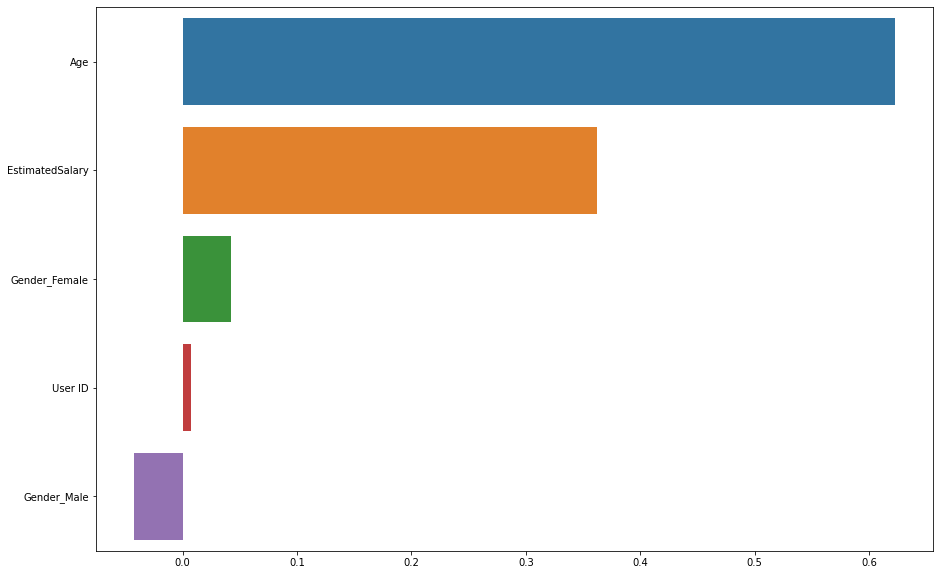

In [14]:
correlations = X.corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
scal = StandardScaler()
X[num_features] = scal.fit_transform(X[num_features])

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import svm

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [19]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

Sklearn SVM

In [20]:
from sklearn import metrics
import time

In [21]:
clf1 = svm.SVC(kernel = 'linear', random_state=0)
start = time.time()
clf1.fit(X_train, y_train)
stop = time.time()
y_pred = clf1.predict(X_test)

In [22]:
print(f"Training time: {stop - start}s")

Training time: 0.006318569183349609s


In [23]:
print('f1_test = ', metrics.f1_score(y_test, y_pred))
print('my_f1_test = ', f1(y_test, y_pred))

print('recall_test = ', metrics.recall_score(y_test, y_pred))
print('my_recall_test = ', recall(y_test, y_pred))

print('precision_test = ', metrics.precision_score(y_test, y_pred))
print('my_precision_test = ', precision(y_test, y_pred))

print('accuracy_test = ', metrics.accuracy_score(y_test, y_pred))
print('my_accuracy_test = ', accuracy(y_test, y_pred))

f1_test =  0.7999999999999999
my_f1_test =  0.7999999999999999
recall_test =  0.75
my_recall_test =  0.75
precision_test =  0.8571428571428571
my_precision_test =  0.8571428571428571
accuracy_test =  0.88
my_accuracy_test =  0.88


My SVM

In [24]:
clf2 = MySVM(lambda_param=0.1)
start = time.time()
clf2.fit(X_train, y_train)
stop = time.time()
y_pred = clf2.predict(X_test)

In [25]:
print(f"Training time: {stop - start}s")

Training time: 11.3189218044281s


In [26]:
print('f1_test = ', metrics.f1_score(y_test, y_pred))
print('my_f1_test = ', f1(y_test, y_pred))

print('recall_test = ', metrics.recall_score(y_test, y_pred))
print('my_recall_test = ', recall(y_test, y_pred))

print('precision_test = ', metrics.precision_score(y_test, y_pred))
print('my_precision_test = ', precision(y_test, y_pred))

print('accuracy_test = ', metrics.accuracy_score(y_test, y_pred))
print('my_accuracy_test = ', accuracy(y_test, y_pred))

f1_test =  0.48484848484848486
my_f1_test =  0.48484848484848486
recall_test =  1.0
my_recall_test =  1.0
precision_test =  0.32
my_precision_test =  0.32
accuracy_test =  0.32
my_accuracy_test =  0.32


In [27]:
myweights = clf2.get_weights()
weights = clf1.coef_

df1 = pd.DataFrame({'weights_for_my_svm' : myweights})
df2 = pd.DataFrame({'weights_for_sklearn_svm' : weights[0]})

In [28]:
all_weights = pd.concat([df1, df2], axis = 1)

In [29]:
all_weights

,weights_for_my_svm,weights_for_sklearn_svm
0,-0.087815,-0.261437
1,1.254255,1.645967
2,0.887997,0.901010
3,-1.534374,0.018455
4,-1.621107,-0.018455


Видимо, у нас сильно не линейно-разделимые данные, сгенерируем датасет самостоятельно

In [30]:
from sklearn import datasets

In [31]:
X, y = datasets.make_blobs(n_samples=1000, n_features=15, centers=2, cluster_std=3.05, random_state=40)
y = np.where(y == 0, -1, 1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.4)

In [33]:
clf = MySVM(n_iters=100)
start = time.time()
clf.fit(X_train, y_train)
stop = time.time()
y_pred = clf.predict(X_test)

In [34]:
print(f"Training time: {stop - start}s")

Training time: 2.525827646255493s


In [35]:
print('f1_test = ', metrics.f1_score(y_test, y_pred))
print('my_f1_test = ', f1(y_test, y_pred))

print('recall_test = ', metrics.recall_score(y_test, y_pred))
print('my_recall_test = ', recall(y_test, y_pred))

print('precision_test = ', metrics.precision_score(y_test, y_pred))
print('my_precision_test = ', precision(y_test, y_pred))

print('accuracy_test = ', metrics.accuracy_score(y_test, y_pred))
print('my_accuracy_test = ', accuracy(y_test, y_pred))

f1_test =  1.0
my_f1_test =  1.0
recall_test =  1.0
my_recall_test =  1.0
precision_test =  1.0
my_precision_test =  1.0
accuracy_test =  1.0
my_accuracy_test =  1.0


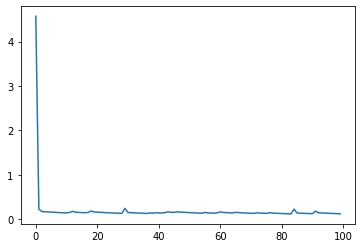

In [36]:
losses = clf.get_losses()
plt.plot(losses)
plt.show()

In [37]:
myweights = clf.get_weights()

df = pd.DataFrame({'weights_for_my_svm' : myweights})

In [38]:
df

,weights_for_my_svm
0,0.034708
1,0.036347
2,-0.069245
3,0.052200
4,-0.034322
5,-0.013521
6,-0.031593
7,0.004433
8,0.027910
9,0.015842


## Дополнительно

**Трюки с ядром**

Существуют случаи, когда мы не можем найти корректный способ провести гиперплоскость, чтобы разделить данные два класса. Есть идея преоброзовать данные в другое пространство, чтобы найти гиперплоскость для разделения данных. Для этого нам потребуется выражение Лагранжа.

$- \Sigma α_i - \frac{1}{2} \underset{i}{\Sigma} \underset{j}{\Sigma} α_i α_j y_i y_j X_i X_j$

От этого можно перейти к функции ядра:

$- \Sigma α_i - \frac{1}{2} \underset{i}{\Sigma} \underset{j}{\Sigma} α_i α_j y_i y_j k(X_i, X_j)$

Это и есть наше выражение для нахождения весов

The Gaussian Radial Basis Function (RBF) kernel

$K(x, x') = \large e^{-γ||x-x'||^2}$

где

$\large γ = \frac{1}{n features * σ^2}, γ > 0$

Вкратце: 

$||x - x'||^2$ - квадрат евлклидова расстояния между двумя векторами признаков 

$γ$ - это скаляр, который определяет, какое влияение оказывает один обучающий пример (точка)

Таким образом, с помощью функции выше мы можем контролировать влияние отдельных сэмплов на общее решение. Чем больше гамма, тем ближе должны быть другие точки, чтобы повлиять на модель.

Данный метод работает в n-мерных пространствах, поэтому визуализировать его невозможно. Рассмотрим пример в одномерном пространстве:

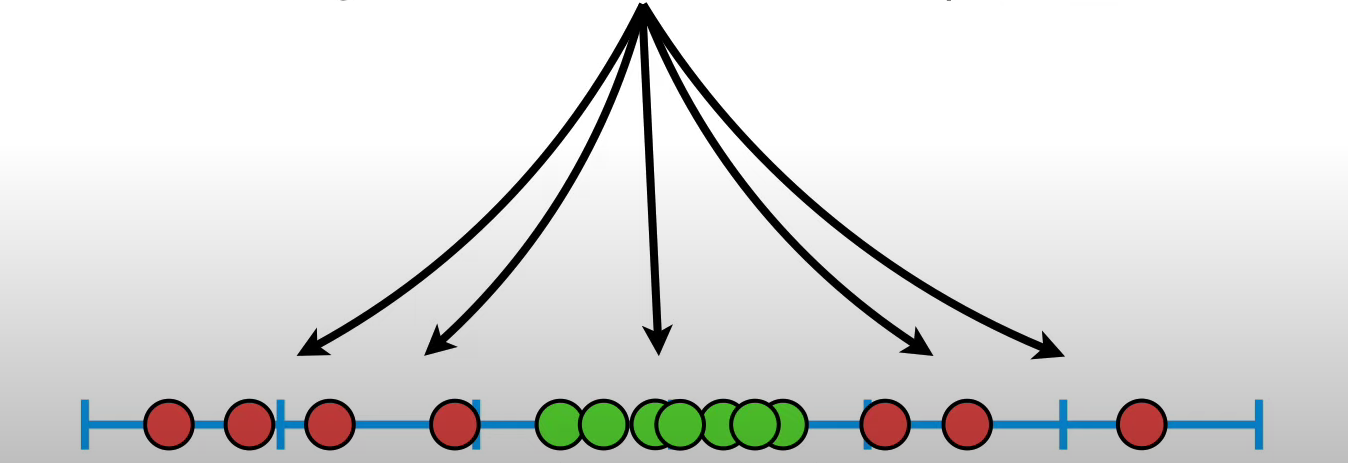

Нам нужно классифицировать данные точки, однако здесь невозможно построить гиперплоскость так, чтобы она корректно разделила их на 2 группы

Для решения этой задачи как раз и используется RBF. В данной ситуации он ведёт себя, как модель взвешенного ближайшего соседа (Weighted Nearest Neighbor). Ближайшие точки к классифицируемому объекту будут оказывать большое влияние на выбор класса. Те, которые далеко от объекта, соответсвенного имеют меньшее влияние. 

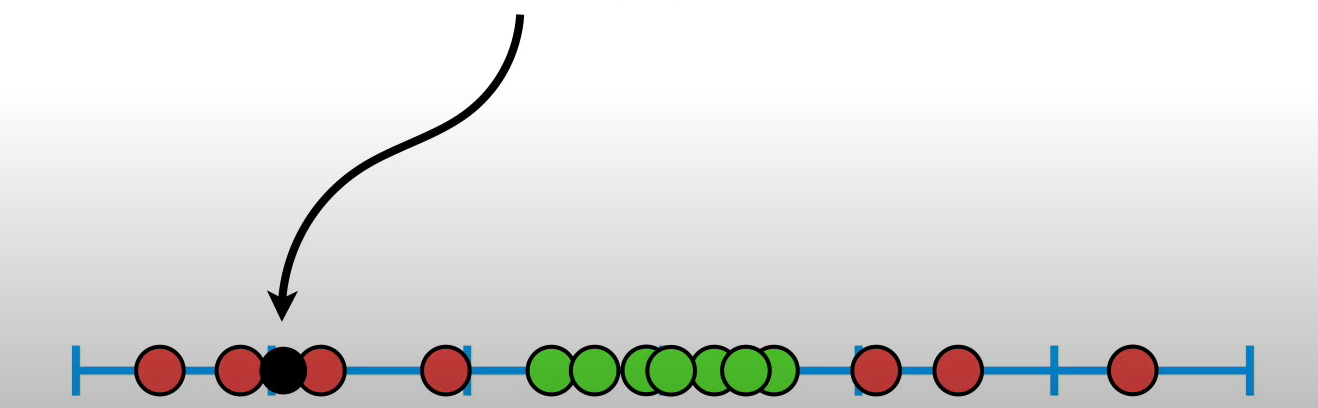

Поскольку ближайшие точки, относятся к "красному" классу, то RBF использует их ответ для предсказания наблюдаемого объекта:

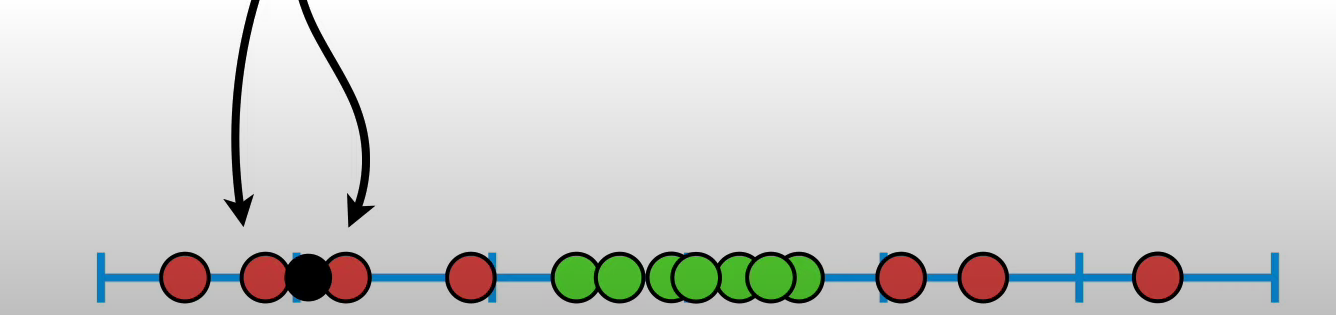

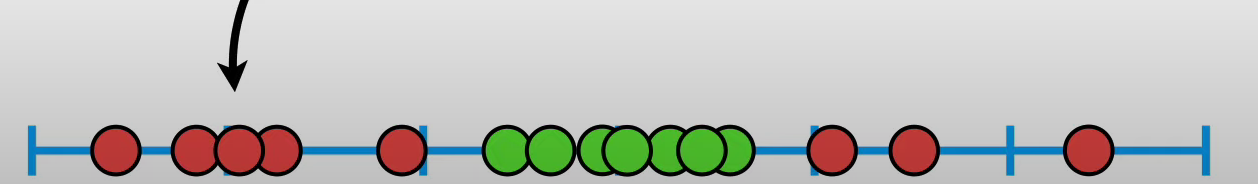

Разберёмся, как RBF определяет, какую величину влияния имеют классифицируемые объекты в тренировочной выборке на предсказываемый объект. Первой величиной, которая определяет влияние явялется квадрат расстояния между двумя точками, а второй - гамма, которая масштабирует это расстояние. Рассмотрим на примере:

пусть гамма = 1 и мы считаем расстояние между двумя близлежашими точками

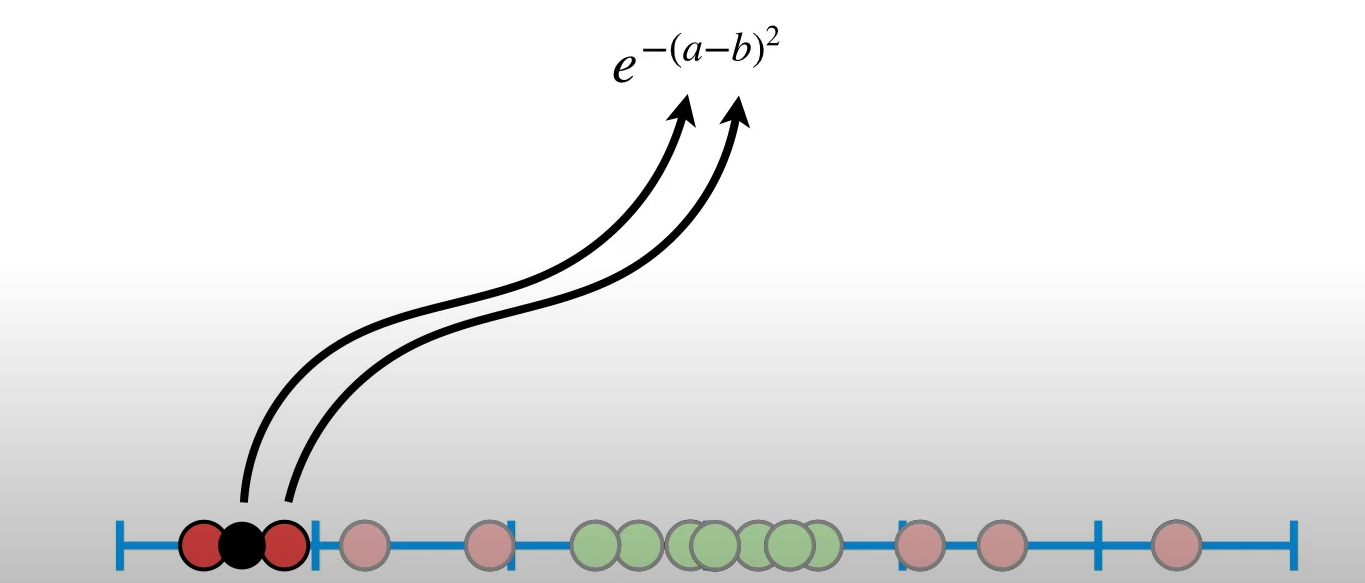

Подставим экспериментальные значения:

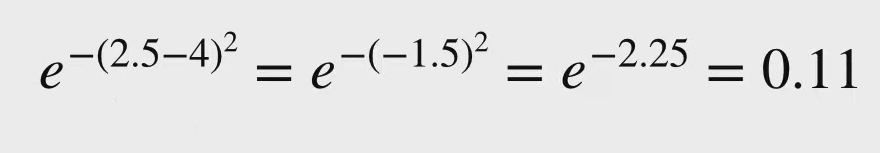

Если гамма = 2:

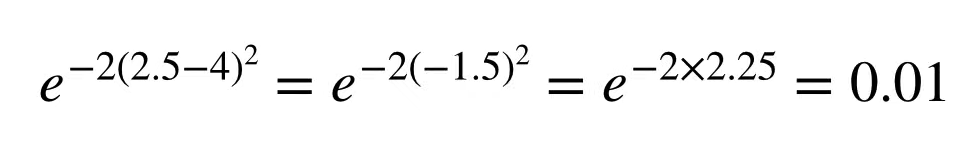

Рассмотрим теперь точки, которые лежат далеко друг от друга:

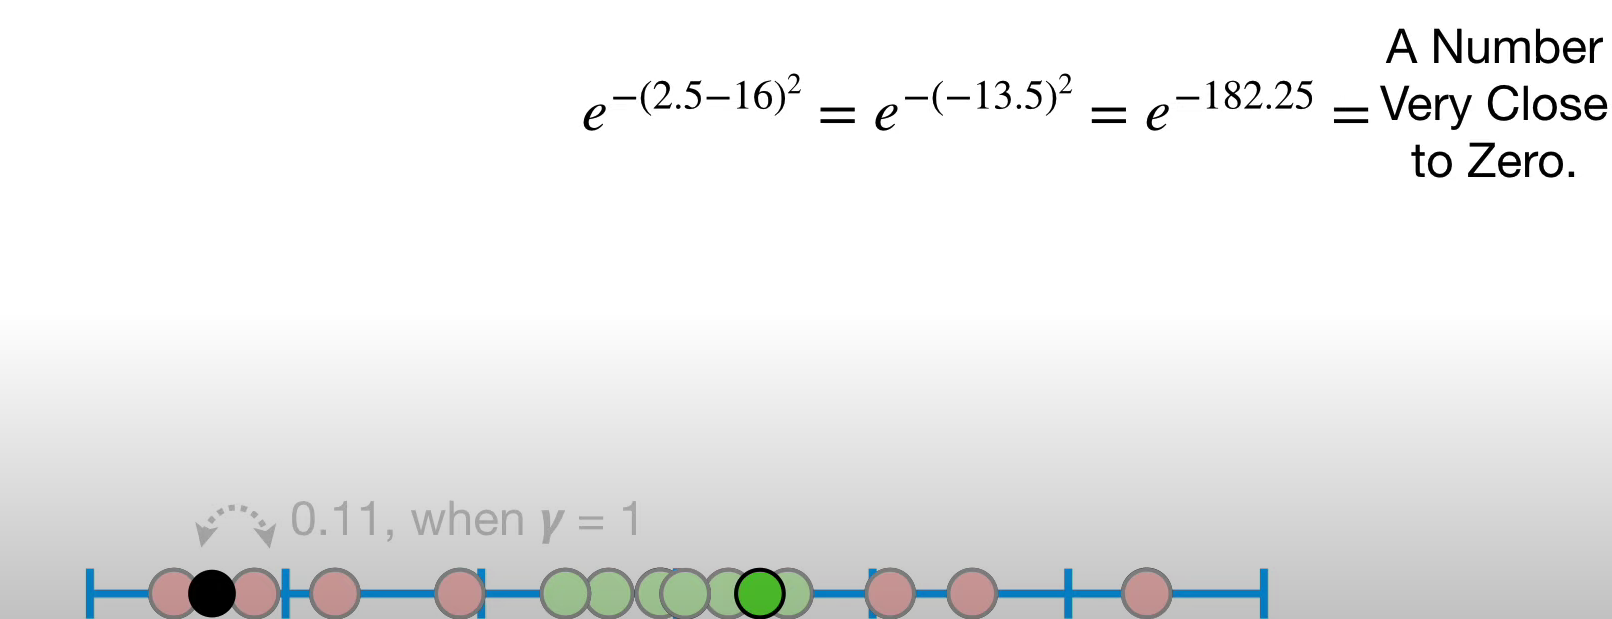

Эти значения влияний помогают лучше определить то, к какому классу относится наблюдаемый объект.